<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Bivariate plots to understand relationship with a binary target variable<span class="tocSkip"></span></h1> 

This analyzes the relationship between a binary target variable (loan approval) and possible predictive factors. This is particularly helpful for:
- Identifying non-linearities, especially useful for logistic regression
- Exploring segmentation
- Uncovering structural relationships between target and independent variables

<h2>Table of Contents<span class="tocSkip"></span></h2>
<ul class="toc-item"><li><span><a href="#Import-key-libraries" data-toc-modified-id="Import-key-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import key libraries</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load dataset</a></span><ul class="toc-item"><li><span><a href="#Explore-the-dataset" data-toc-modified-id="Explore-the-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explore the dataset</a></span></li><li><span><a href="#Target-variable-analysis" data-toc-modified-id="Target-variable-analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Target variable analysis</a></span></li></ul></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bivariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Continuous-x-variables" data-toc-modified-id="Continuous-x-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Continuous x-variables</a></span><ul class="toc-item"><li><span><a href="#Bivariate-plot" data-toc-modified-id="Bivariate-plot-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Bivariate plot</a></span></li></ul></li><li><span><a href="#Categorical-/-Discrete-x-variables" data-toc-modified-id="Categorical-/-Discrete-x-variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorical / Discrete x-variables</a></span><ul class="toc-item"><li><span><a href="#Barchart" data-toc-modified-id="Barchart-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Barchart</a></span></li><li><span><a href="#Bivariate-plot---Categorical" data-toc-modified-id="Bivariate-plot---Categorical-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Bivariate plot - Categorical</a></span></li><li><span><a href="#Bivariate-plot---Discrete" data-toc-modified-id="Bivariate-plot---Discrete-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Bivariate plot - Discrete</a></span></li></ul></li></ul></li><li><span><a href="#Segmentation-analysis" data-toc-modified-id="Segmentation-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Segmentation analysis</a></span><ul class="toc-item"><li><span><a href="#Bivariate-plots-with-numerical-x-variables" data-toc-modified-id="Bivariate-plots-with-numerical-x-variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Bivariate plots with numerical x-variables</a></span></li><li><span><a href="#Categorical-x-variable" data-toc-modified-id="Categorical-x-variable-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Categorical x-variable</a></span><ul class="toc-item"><li><span><a href="#Barplot" data-toc-modified-id="Barplot-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Barplot</a></span></li><li><span><a href="#Bivariate-plot" data-toc-modified-id="Bivariate-plot-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Bivariate plot</a></span></li></ul></li></ul></li><li><span><a href="#Appendix:-More-Examples" data-toc-modified-id="Appendix:-More-Examples"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix: More Examples</a></span></li><li><span><a href="#Appendix:-Data-Dictionary" data-toc-modified-id="Appendix:-Data-Dictionary-5"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendix: Data Dictionary</a></span></li></ul></ul>

# Import key libraries

In [1]:
# Import key libraries
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', category=FutureWarning) # Suppress an error related to pandas

%load_ext autoreload
%autoreload 2

C:\Users\daniel.wang\AppData\Local\Temp\ipykernel_24684\4168535220.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Import code stored in the utilities folder**

In [2]:
import sys
sys.path.insert(0, "../../utilities")
from model_plots import bivariate_plots_categorical

# Load dataset

We read in the data using pandas, with low_memory=False in case the dataset is large. Pandas can handle csv in zip files.

This dataset will be used to predict mortgage loan approvals.

In [3]:
dataset = pd.read_csv("sample_input/loan_approval_keep_as_zip.zip", low_memory=False)
dataset.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


**Check the column names**

In [4]:
np.sort(dataset.columns.values)

array(['Credit_Score', 'Credit_Worthiness', 'Gender', 'ID',
       'Interest_rate_spread', 'LTV', 'Neg_ammortization', 'Region',
       'Secured_by', 'Security_Type', 'Status', 'Upfront_charges', 'age',
       'approv_in_adv', 'business_or_commercial',
       'co-applicant_credit_type', 'construction_type', 'credit_type',
       'dtir1', 'income', 'interest_only', 'loan_amount', 'loan_limit',
       'loan_purpose', 'loan_type', 'lump_sum_payment', 'occupancy_type',
       'open_credit', 'property_value', 'rate_of_interest',
       'submission_of_application', 'term', 'total_units', 'year'],
      dtype=object)

**The Status variable tells us whether the loan was approved or rejected**. Rejected is 1, while Approved is 0.

In [5]:
dataset["Approval"] = 1-dataset['Status']

## Explore the dataset
**This uses the data exploration code, which should be automatically downloaded and available if you are using the Gryphon tool** 

In [6]:
from data_exploration import dataset_overview

**Get information about all numerical variables in the dataset** 

In [7]:
num_info = dataset_overview.get_numerical_info(dataset)

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1,Approval
data type,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,int64
count,148670,148670,148670,112231,112031,109028,148629,133572,139520,148670,133572,148670,124549,148670
# non-missing,148670,148670,148670,112231,112031,109028,148629,133572,139520,148670,133572,148670,124549,148670
# missing,0,0,0,36439,36639,39642,41,15098,9150,0,15098,0,24121,0
# of 0s,0,0,0,1,9,20770,0,0,1260,0,0,112031,0,36639
# unique values,148670,1,211,131,22516,58271,26,385,1001,401,8484,2,57,2
sum,14751706415.0,300164730.0,49227275000.0,454027.795,49479.1253,351614877.69,49811015.0,66504626000.0,970687920.0,104037646.0,9716889.799,36639.0,4699599.0,112031.0
mean,99224.5,2019.0,331117.743997,4.045476,0.441656,3224.996127,335.136582,497893.465696,6957.338876,699.789103,72.746457,0.246445,37.732932,0.753555
standard deviation,42917.476598,0.0,183909.310127,0.561391,0.513043,3251.12151,58.409084,359935.315562,6496.586382,115.875857,39.967603,0.430942,10.545435,0.430942
skewness,0.0,0.0,1.666998,0.388406,0.280762,1.754076,-2.174822,4.586276,17.307695,0.004767,120.615337,1.176762,-0.551465,-1.176762


**Get information about all non-numerical variables in the dataset** 

In [8]:
cat_info = dataset_overview.get_non_numerical_info(dataset)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
data type,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,...,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
# non-missing,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,...,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
# missing,3344,0,908,0,134,0,0,0,121,0,...,0,0,0,0,0,0,200,200,0,0
# of blanks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
# unique values,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
most frequent,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
average length,2.089608,7.938239,4.676478,5.0,2.000901,2.0,3.99626,4.720697,6.996744,7.047824,...,2.0,2.0,4.0,2.0,3.398191,3.0,4.882801,7.348799,5.158532,6.000444
potentially numeric,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
potentially datetime,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


## Target variable analysis

The target variable is the 'Approval' variable, where 1 indicates Approval and 0 indicates Decline. 

For more in-depth analysis, use the functions provided by the data exploration template.

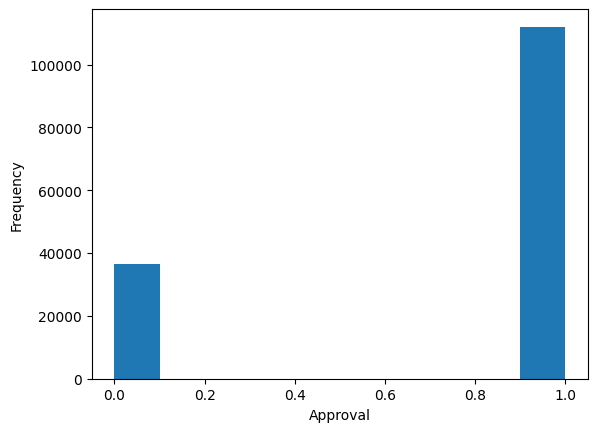

In [9]:
fig, ax = plt.subplots()
ax.hist(dataset['Approval'])
ax.set_xlabel("Approval")
ax.set_ylabel("Frequency")
plt.show()

In [10]:
# Or a simple count
dataset['Approval'].value_counts()

Approval
1    112031
0     36639
Name: count, dtype: int64

# Bivariate Analysis

Bivariate analysis reviews the relationship between the target variable with one other variable at a time. It can inform whether the variable is useful as a predictor, or if additional transformations of the variable is needed.

For more examples, including discussion of transformations, see Appendix

## Continuous x-variables

Unlike for a continuous target variable, we cannot create a scatter plot, as the target variable is always 0 or 1. 

**Here is what a scatterplot would look like, between Approval and property_value**. We limit to a sample of 1000 observations here.

Sampled 1000 out of 148670 observations


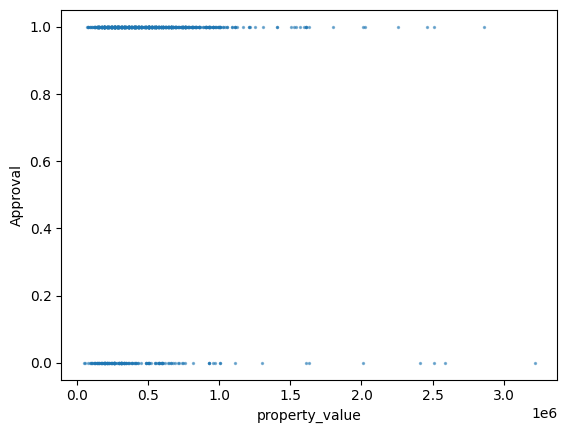

In [11]:
x_variable = "property_value"
target = "Approval"
N = 1000 # Maximum number of observations

plot_data = dataset[[target, x_variable]]
if plot_data.shape[0] > N:
    plot_data = plot_data.sample(N)
    print("Sampled {} out of {} observations".format(N, dataset.shape[0]))
    
fig, ax = plt.subplots() 
ax.scatter(x=plot_data[x_variable], y=plot_data[target], alpha=0.5, s=2)
ax.set_ylabel(target)
ax.set_xlabel(x_variable);

Clearly, it is difficult to identify any clear patterns in the above. 

### Bivariate plot

A **bivariate plot** where the average Approval rate is calculated for each bin in the x-variable can show a clearer relationship between the target variable and a contintuous x-variable to help decide on the appropriate transformation.

For logistic regression, it is often useful to look at the y-axis as log-odds in addition to the proportion.

If needed, we can also use a different scale for the x-axis.

**Below we show a bivariate plot between Approval rate and property_value, without any axis transforms**

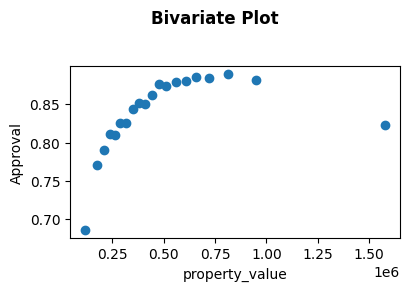

In [12]:
x_variable = "property_value"
target = "Approval"
fig, plotdata = bivariate_plots_categorical.bivariate_continuous(dataset, target, x_variable, num_buckets=20, 
                                                                y_scale='linear', x_scale='linear', with_count=False, header=None)

**We can easily change the y-axis to log-odds by using the logit scale, by changing y_scale to 'logit'**

If there are missing values, those data points will not show up on the data, so it is important to understand what the dependent variable value looks like for these. Especially if you will be imputing the missing values

In [13]:
x_variable = "property_value"
target = "Approval"

if any(dataset[x_variable].isna()):
    DVmiss = dataset.loc[dataset[x_variable].isna(), target]
    print(f"# missing: {dataset[x_variable].isna().sum()}. Average DV: {np.nanmean(DVmiss)}. # missing DV: {DVmiss.isna().sum()}")
    
else:
    print(f"No missing values for {x_variable}")


# missing: 15098. Average DV: 0.00013246787653993907. # missing DV: 0


**There is a positive correlation between Approval Rate and Property value up to 600K, where it flattens out, and for the highest property values, the approval rate is lower**

Intuitively speaking, property_value is likely indirectly related to approval rate. Here we plot the bivariate plot for income.

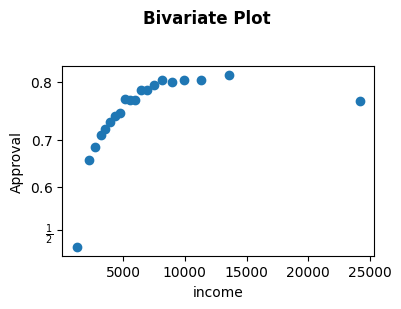

In [14]:
x_variable = "income"
target = "Approval"
fig, plotdata = bivariate_plots_categorical.bivariate_continuous(dataset, target, x_variable, num_buckets=20, 
                                                                y_scale='logit', x_scale='linear', with_count=False, header=None)

**See the doc strings for more information**

In [15]:
help(bivariate_plots_categorical.bivariate_continuous)

Help on function bivariate_continuous in module model_plots.bivariate_plots_categorical:

bivariate_continuous(used_data, y_var, x_var, num_buckets=20, y_scale='linear', x_scale='linear', with_count=True, with_CI=False, lower=-inf, upper=inf, trendline=False, header=None, figsize=(4, 3))
    Generates bivariate plots for continuous variables, where the data is bucketed based on x-variable percentiles.
    Provides option to scale the y-axis and count of observations in each bucket (in case there is concentration)
    :param used_data: a single pandas DataFrame containing the y-variable and the x-variable
    :param y_var: a single string with the name of the y-variable
    :param x_var: a single string with the name of the x-variable
    :param num_buckets: Integer number of buckets (quantiles) for which to group the x-variable values
    :param y_scale: Scale the y-axis, either: 'linear', 'log', 'logit', or 'symlog'
    :param x_scale: Scale the x-axis, either: 'linear', 'log', 'logit

## Categorical / Discrete x-variables

For these variables, the data is grouped by each unique value. We can look at barchart and aggregated bivariate plot.

Some plots, such as box plot and violin plot are only useful when the target variable is continuous.


### Barchart

Compares the average dependent variable value by x-variable value

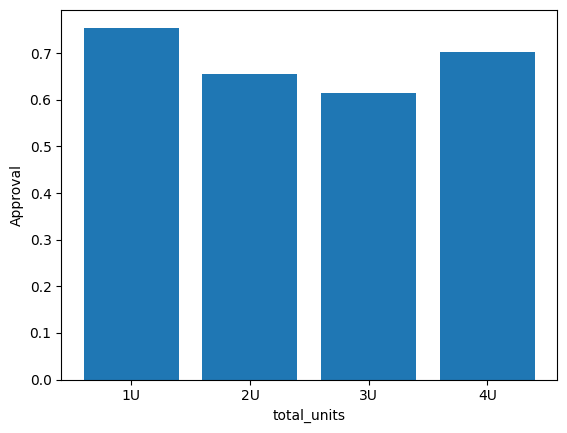

In [16]:
x_variable = "total_units"
target = "Approval"

plot_data = dataset[[target, x_variable]].groupby(x_variable).mean()

fig, ax = plt.subplots() 
ax.bar(x=plot_data.index, height=plot_data[target])
ax.set_ylabel(target)
ax.set_xlabel(x_variable)

plt.show()

### Bivariate plot - Categorical

This plot is similar to the barplot, by showing the average target variable value by x-variable category, but it offers additional information such as number of observations, confidence intervals, etc. 

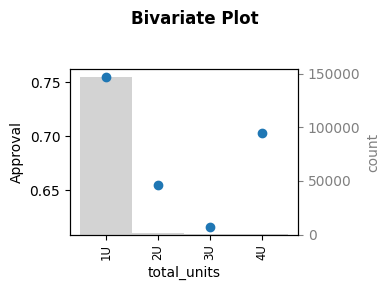

In [17]:
x_variable = "total_units"
target = "Approval"
fig, plotdata = bivariate_plots_categorical.bivariate_categorical(dataset, target, x_variable, discrete=False, 
                                                                  y_scale='linear', with_count=True, header=None)

**The bivariate plot provides the number of observations (grey shade), showing that 2-4 units are very rare in this dataset**

### Bivariate plot - Discrete

Discrete plots are used for numerical x-variables whose values should be plotted separately. There we plot loan term. The chart also shows that most loands are 360 months (30 years), and some at 180 months, 240 months, and 300 months. With the 300 months having a much lower approval rate. 

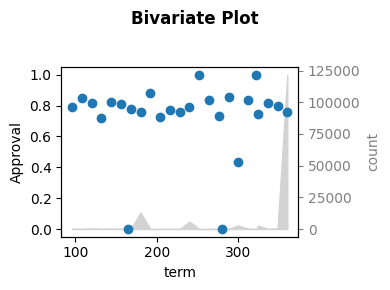

In [18]:
x_variable = "term"
target = "Approval"
fig, plotdata = bivariate_plots_categorical.bivariate_categorical(dataset, target, x_variable, discrete=True, 
                                                                  y_scale='linear', with_count=True, header=None)

# Segmentation analysis

This looks at whether the relationship between target and x-variables differ by segments of the data. Each color represents a segment. The left chart shows the relationship between y and x, and right hand side shows the number of observations per segment and x-bucket.

## Bivariate plots with numerical x-variables

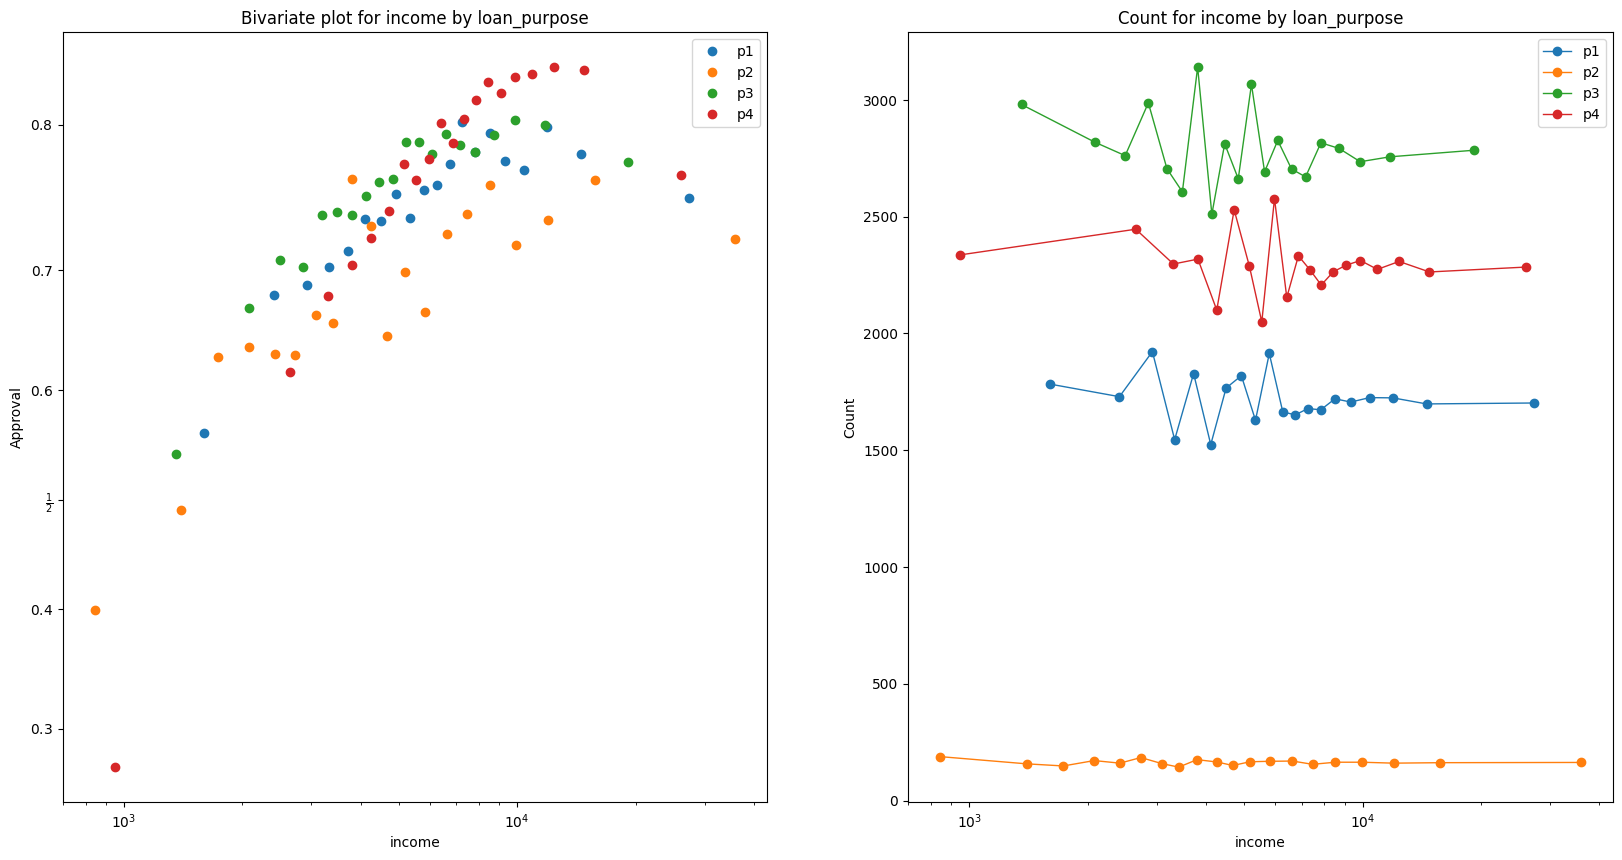

In [19]:
x_variable = "income"
target = "Approval"
segment_variable = "loan_purpose"
fig, plotdata = bivariate_plots_categorical.segment_bivariate_continuous(dataset, target, x_variable, 
                                                                         segment_variable, num_buckets=20, 
                                                                         y_scale='logit', x_scale='log')

## Categorical x-variable

### Barplot

<Axes: xlabel='loan_type', ylabel='count'>

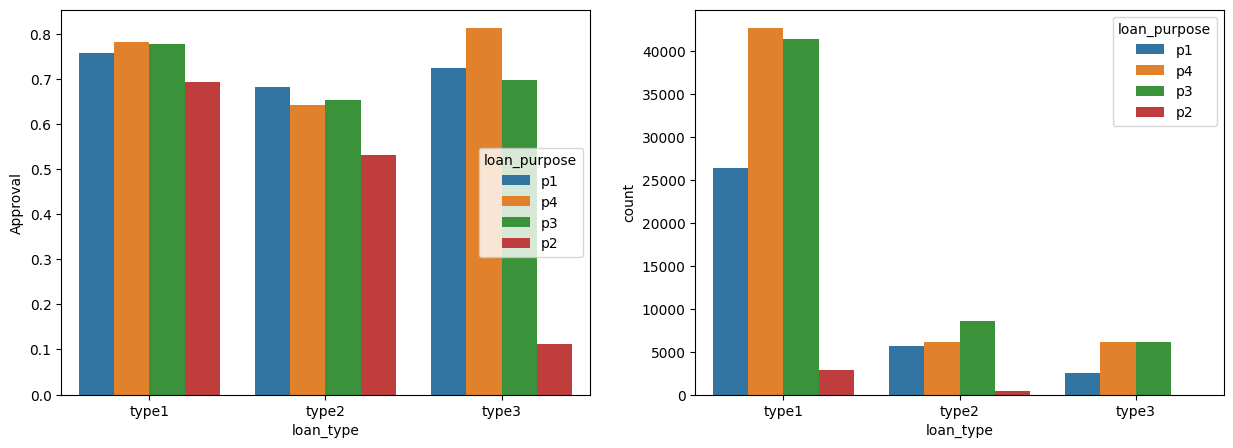

In [20]:
x_variable = "loan_type"
target = "Approval"
segment_variable = "loan_purpose"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(data=dataset, x=x_variable, y=target, hue=segment_variable, ci=False, ax = ax1)
sns.countplot(data=dataset, x=x_variable, hue=segment_variable, ax = ax2)

### Bivariate plot

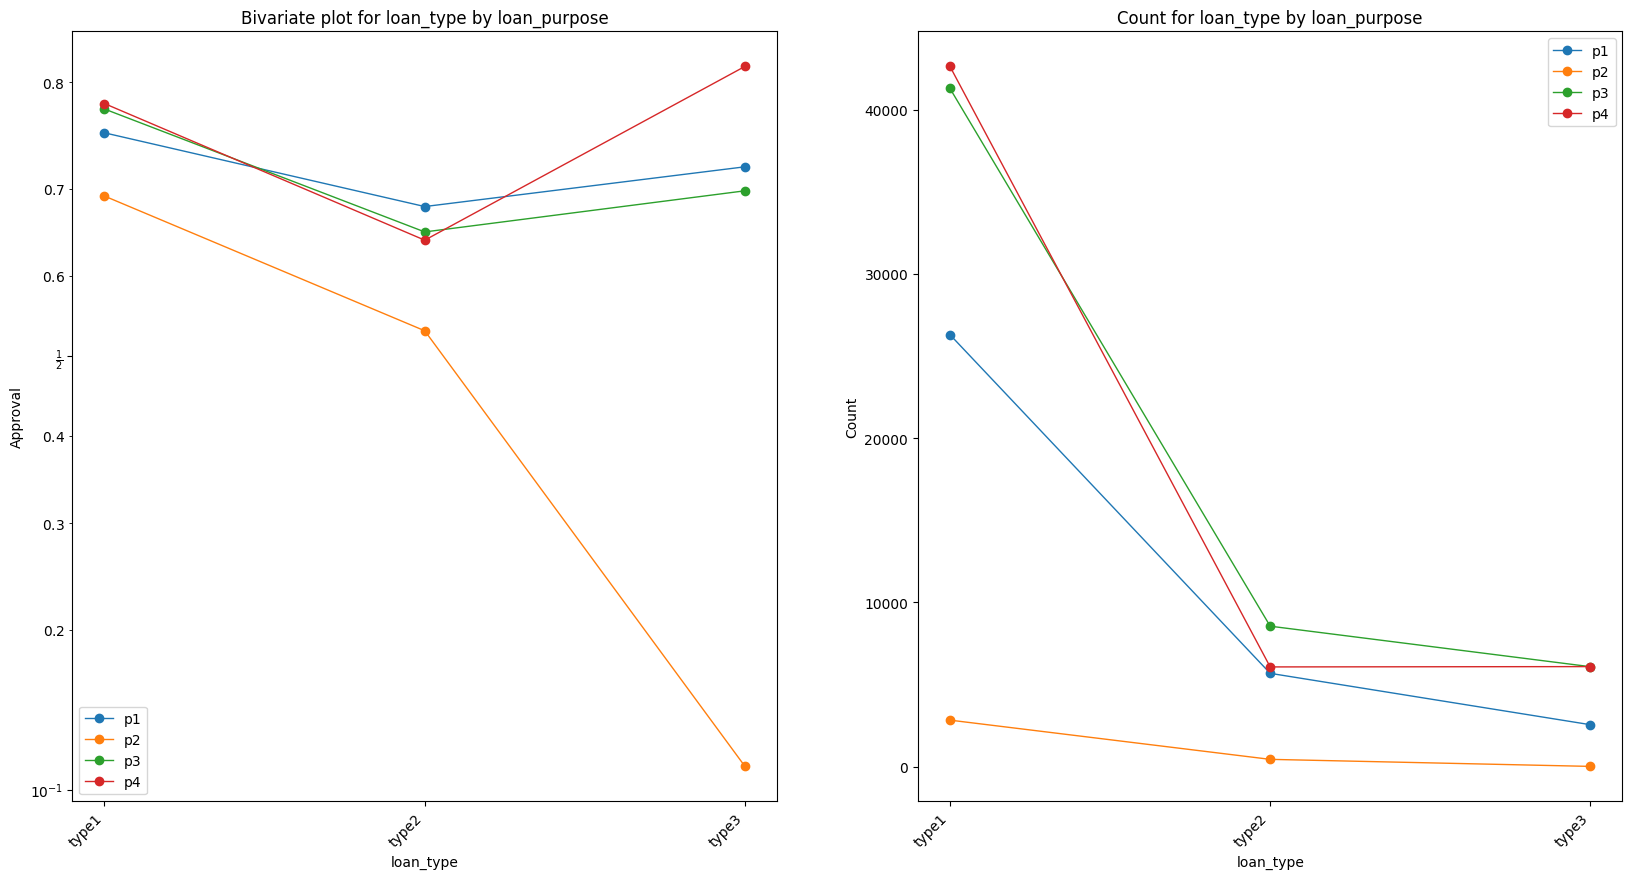

In [21]:
x_variable = "loan_type"
target = "Approval"
segment_variable = "loan_purpose"

fig, plotdata = bivariate_plots_categorical.segment_bivariate_categorical(dataset, target, x_variable, segment_variable, 
                                                                          discrete = False, y_scale='logit')

# Appendix: More Examples

We show more examples of bivariate plots to inform transformations and imputation of numeric variables. These were used to come up with appropriate transformations for some of the other notebooks in this folder.

## Credit_Score

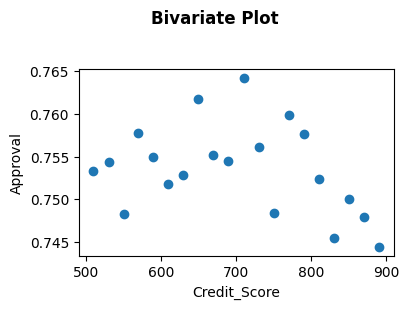

In [28]:
x_variable = "Credit_Score"
target = "Approval"
fig, plotdata = bivariate_plots_categorical.bivariate_continuous(dataset, target, x_variable, num_buckets=20, 
                                                                y_scale='linear', x_scale='linear', with_count=False, 
                                                                 header=None, figsize=(4,3))

In [29]:
if any(dataset[x_variable].isna()):
    DVmiss = dataset.loc[dataset[x_variable].isna(), target]
    print(f"# missing: {dataset[x_variable].isna().sum()}. Average DV: {np.nanmean(DVmiss)}. # missing DV: {DVmiss.isna().sum()}")
    
else:
    print(f"No missing values for {x_variable}")


No missing values for Credit_Score


## loan_amount

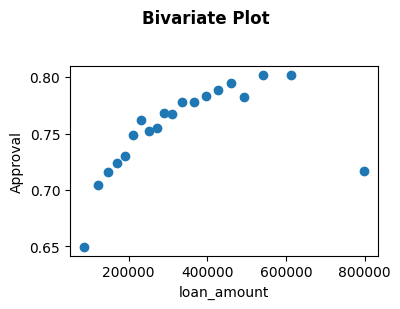

In [30]:
x_variable = "loan_amount"
target = "Approval"
fig, plotdata = bivariate_plots_categorical.bivariate_continuous(dataset, target, x_variable, num_buckets=20, 
                                                                y_scale='linear', x_scale='linear', with_count=False, 
                                                                 header=None, figsize=(4,3))

In [31]:
if any(dataset[x_variable].isna()):
    DVmiss = dataset.loc[dataset[x_variable].isna(), target]
    print(f"# missing: {dataset[x_variable].isna().sum()}. Average DV: {np.nanmean(DVmiss)}. # missing DV: {DVmiss.isna().sum()}")
    
else:
    print(f"No missing values for {x_variable}")


No missing values for loan_amount


## LTV

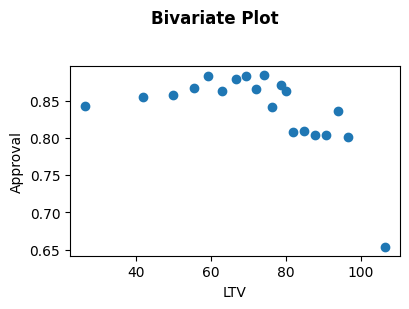

In [32]:
x_variable = "LTV"
target = "Approval"
fig, plotdata = bivariate_plots_categorical.bivariate_continuous(dataset, target, x_variable, num_buckets=20, 
                                                                y_scale='linear', x_scale='linear', with_count=False, 
                                                                 header=None, figsize=(4,3))

In [33]:
if any(dataset[x_variable].isna()):
    DVmiss = dataset.loc[dataset[x_variable].isna(), target]
    print(f"# missing: {dataset[x_variable].isna().sum()}. Average DV: {np.nanmean(DVmiss)}. # missing DV: {DVmiss.isna().sum()}")
    
else:
    print(f"No missing values for {x_variable}")


# missing: 15098. Average DV: 0.00013246787653993907. # missing DV: 0


**Almost all of the missing LTV values are associated with No Approval** 

## DTI

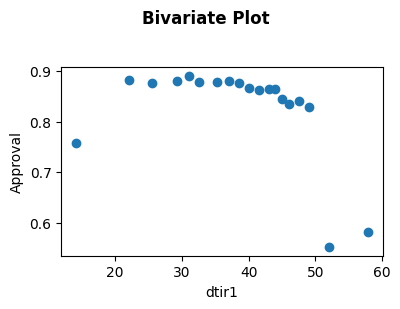

In [34]:
x_variable = "dtir1"
target = "Approval"
fig, plotdata = bivariate_plots_categorical.bivariate_continuous(dataset, target, x_variable, num_buckets=20, 
                                                                y_scale='linear', x_scale='linear', with_count=False, 
                                                                 header=None, figsize=(4,3))

In [35]:
if any(dataset[x_variable].isna()):
    DVmiss = dataset.loc[dataset[x_variable].isna(), target]
    print(f"# missing: {dataset[x_variable].isna().sum()}. Average DV: {np.nanmean(DVmiss)}. # missing DV: {DVmiss.isna().sum()}")
    
else:
    print(f"No missing values for {x_variable}")


# missing: 24121. Average DV: 0.3238257120351561. # missing DV: 0


**Average dependent variable is much lower than anywhere else in the data. This may prompt creating a 'missing DTI' variable in addition to imputing**

However, we know that missing LTV should be removed, and the missingness could be related. After removing the missing LTV rows, the average target value is now closer to the median.

In [39]:
dataset.loc[dataset["dtir1"].isna() & ~dataset["LTV"].isna(), target].mean()

0.8654847645429363

# Appendix: Data Dictionary

* ID = Customer ID of Applicant
* year = Year of Application
* loan limit = maximum avaliable amount of the loan allowed to be taken
* Gender = sex type
* approv_in_adv = Is loan pre-approved or not
* loan_type = Type of loan
* loan_purpose = the reason you want to borrow money
* Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
* open_credit = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
* business_or_commercial = Usage type of the loan amount
* loan_amount = The exact loan amount
* rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
* Interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
* Upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
* term = the loan's repayment period
* Neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
* interest_only = amount of interest only without principles
* lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
* property_value = the present worth of future benefits arising from the ownership of the property
* construction_type = Collateral construction type
* occupancy_type = classifications refer to categorizing structures based on their usage
* Secured_by = Type of Collatoral
* total_units = number of unites
* income = refers to the amount of money, property, and other transfers of value received over a set period of time
* credit_type = type of credit
* co-applicant_credit_type = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
* age = applicant's age
* submission_of_application = Ensure the application is complete or not
* LTV = life-time value (LTV) is a prognostication of the net profit
* Region = applicant's place
* Security_Type = Type of Collatoral
* status = Loan status (Approved/Declined)
* dtir1 = debt-to-income ratio